# Comparing the performances of three Quantum Processing Units (namely IBMQ Athens, Santiago and Belem) by building their noise models using                                       Randomized Benchmarking.

In [37]:
from qiskit import QuantumCircuit, execute
from qiskit import IBMQ, Aer
from qiskit.visualization import plot_histogram
import numpy as np

# first we load the necessary packages 

In [38]:
IBMQ.save_account('07f879b8e9a85f2d318bb3ea48fe6bfc14907207745e9d584650779d3906be087c7e160b89f4b5c31943999cb602631d9ba46416acb9004a511d17d8c903ffe6')

configrc.store_credentials:WARNING:2021-04-29 22:04:19,572: Credentials already present. Set overwrite=True to overwrite.


In [39]:
provider = IBMQ.load_account()

C:\Users\DRA\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-04-29 22:04:33,072: Credentials are already in use. The existing account in the session will be replaced.


In [10]:
from qiskit.providers.aer.noise import NoiseModel
import qiskit.ignis.verification.randomized_benchmarking as rb
import matplotlib.pyplot as plt

We make noise Models to mimic the Circuit Based Quantum Processors that we intend to compare.

In [28]:
# We basically build the noise model using the backend properties (that have been drawn from my IBM QE account in the previous lines of code)

backend_santiago = provider.get_backend('ibmq_santiago')
noise_model_santiago = NoiseModel.from_backend(backend_santiago)

backend_athens = provider.get_backend('ibmq_athens')
noise_model_athens = NoiseModel.from_backend(backend_athens)

backend_belem = provider.get_backend('ibmq_belem')
noise_model_belem = NoiseModel.from_backend(backend_belem)

# We wish to compare IBMQ Athens , IBQ Santiago and IBMQ Belem, all of which are superconducting QPUs



Random circuit generation from a collection of gates

In [40]:
#glenghts here is an array to store the gate lengths. We consider them to vary from 1 to 300.There are 9 lengths in total.
 
#npq stores the number and pattern of the qubits, since we are considering 2 qubit circuits, the values that npq can take are 0, 1 and 2

glengths = [1, 10, 20, 75, 100, 125, 150, 175, 300]

npq=[[0,1,2]]

rb_circs, _ = rb.randomized_benchmarking_seq(length_vector = glengths, rb_pattern = npq)

#rb_circs here refers to the 2-D vector created by the function rb.randomized_benchmarking_seq

We now draw the circuit with the given glengths

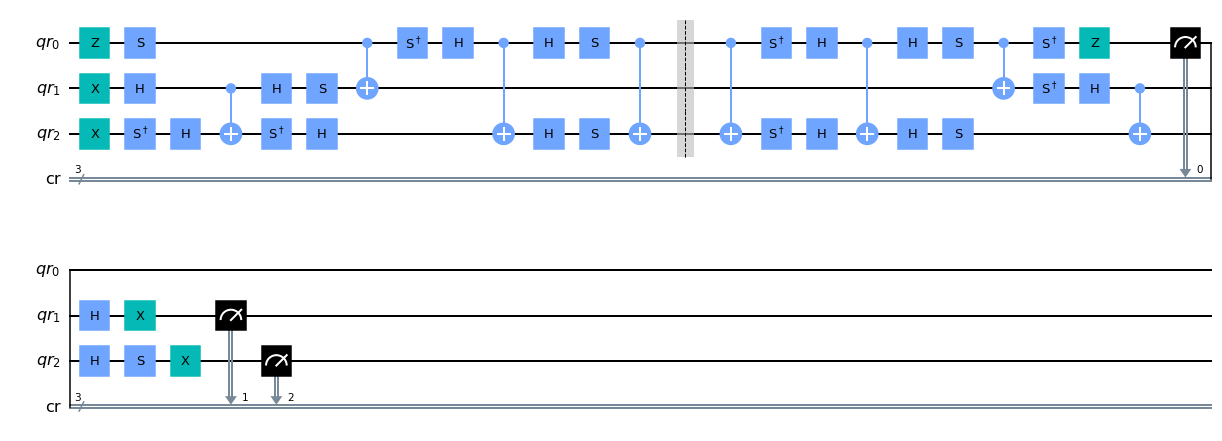

In [30]:
rb_circs[0][0].draw('mpl') 

# Running the randomized circuits using noise models

In [32]:
# We now run the 9 circuits generated one at a time using both the three noise models. For loop has been used to scan through the array.
countOf_000_athens = np.zeros(9) # To store the counts of 000 for athens
countOf_000_santiago = np.zeros(9)  # To store the counts of 000 for santiago
countOf_000_belem = np.zeros(9)  # To store the counts of 000 for belem
backend = Aer.get_backend('qasm_simulator')
sh = 1000*256   # the number of shots, I have chosen an arbitrarily large number
for i in range(9):
    # We first obain the results for the athens noise model 
    job_athens = execute(rb_circs[0][i], backend, noise_model=noise_model_athens, shots = sh)
    results_athens = job_athens.result()
    counts_athens = results_athens.get_counts()
    countOf_000_athens[i] = counts_athens["000"] #we're extracting the 000 counts from the athens results
    
    # Now obtaining the results for the santiago noise model using same number of shots
    job_santiago = execute(rb_circs[0][i], backend, noise_model=noise_model_santiago, shots = sh)
    results_santiago = job_santiago.result()
    counts_santiago = results_santiago.get_counts()
    countOf_000_santiago[i] = counts_santiago["000"] #we're extracting the 000 counts from the santiago results
    
    #Results for the belem noise model
    job_belem = execute(rb_circs[0][i], backend, noise_model=noise_model_belem, shots = sh)
    results_belem = job_belem.result()
    counts_belem = results_belem.get_counts()
    countOf_000_belem[i] = counts_belem["000"]
    
    
    
    print("Finished circuit run ",str(i+1),"out of 9 on using the three noise models.") # Just to check if the code runs





Finished circuit run  1 out of 9 on using the three noise models.
Finished circuit run  2 out of 9 on using the three noise models.
Finished circuit run  3 out of 9 on using the three noise models.
Finished circuit run  4 out of 9 on using the three noise models.
Finished circuit run  5 out of 9 on using the three noise models.
Finished circuit run  6 out of 9 on using the three noise models.
Finished circuit run  7 out of 9 on using the three noise models.
Finished circuit run  8 out of 9 on using the three noise models.
Finished circuit run  9 out of 9 on using the three noise models.


# Plotting and comparing results

We plot the counts of 000 obtain for each of the QPUs against the glength parameter, i.e the length of the circuit for each count. 
The plot so obtained will show us the probability of getting the right result 000 as the length of the circuit increases.

Text(0, 0.5, 'probability of obtaining 000')

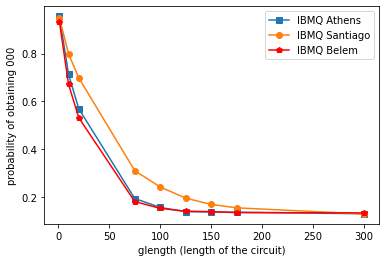

In [36]:
# To obtain the probability, we divide the number of counts by the number of shots.
plt.plot(glengths, countOf_000_athens/sh, marker = 's')    
plt.plot(glengths, countOf_000_santiago/sh, marker = 'o')
plt.plot(glengths, countOf_000_belem/sh, marker = 'p', color='red')
plt.legend(['IBMQ Athens','IBMQ Santiago' , 'IBMQ Belem'])
plt.xlabel('glength (length of the circuit)')
plt.ylabel('probability of obtaining 000')

#  Observations and Inference

According to the plot obtained above, we observe that as the length of the circuit / gate length increases, the probabilty of obtaining our desired result / an accurate result decreases for all the three QPU s .
But looking closely, it is seen that the decrease in accuracy for the IBMQ Santiago is slightly lesser than the other two . This is followed by IBM Q Athens whose decrease in accuracy is slightly lesser than IBMQ Belem until the gate length of around 120 beyond which both Athens and Belem happen to have similar gate fidelity.
After the gate length of around 250, all the three models show similar behaviour.
Hence on the basis of avergage CNOT error, or gate error, we can rank the three models in the following order 
IBMQ Santiago < IBMQ Athens < IBMQ Belem

# Comparing the results with the standard Avg. CNOT values of the gates obtained from IBM QE

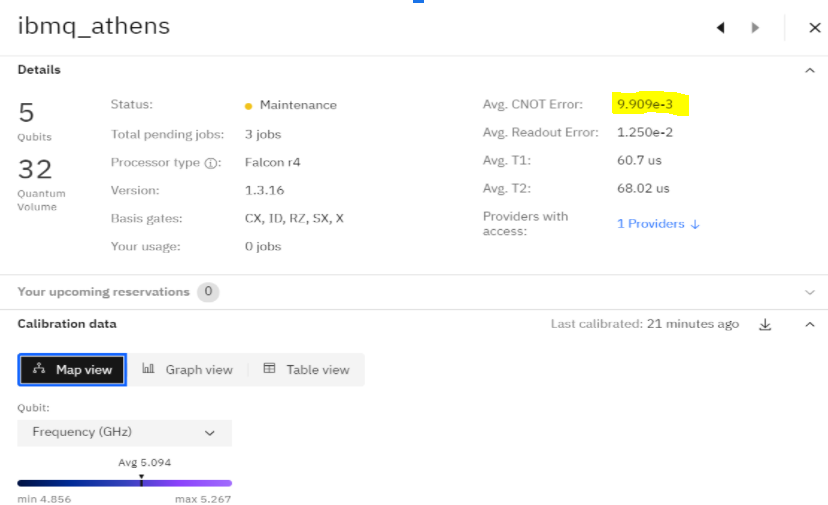


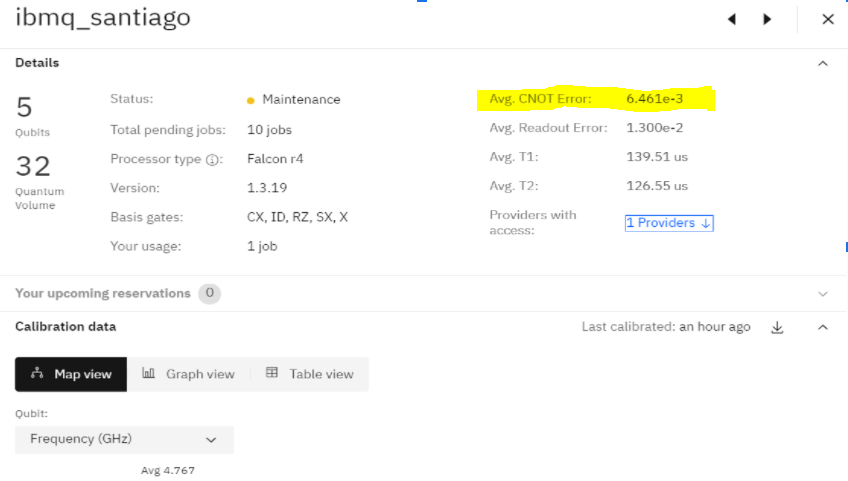


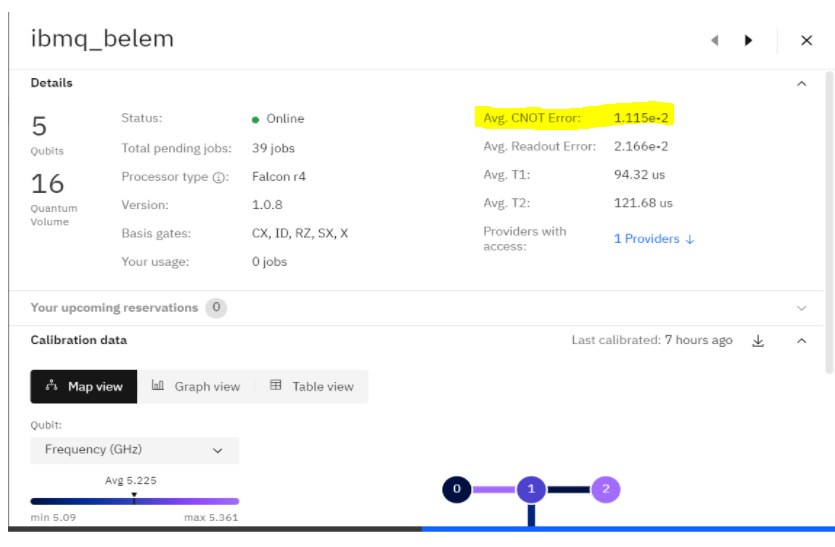

As can be seen from the standard set of Avg CNOT Error values, the gate error for IBMQ Belem is most followed by IBMQ Santiago , and is least for IBMQ Athens.

Therefore, these are in tandem with the graphical results.

# Implications / Impact

The degree to which a qubit is affected by noise is dependent on the amount of noise impinging on the qubit and it's susceptibility to that noise.
Both these points are intrinsically realted to the fabrication and design of qubits. The noise response of a qubit depends on how it couples with noise (either through longitudinal or transverse coupling with respect to the qubit's quantization axis). 